In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


According to [Newton+2019](https://arxiv.org/pdf/1906.10703.pdf), age of TOI200/DS Tuc A ~45 Myr.

In [2]:
#search by toiid
toiid=1726
t = cr.Star(toiid=toiid)
t.target_coord #note distance is also known for TOIs

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (117.479375, 27.36313333, 22.4035)>

## age using gyrochronology

Available sectors: [20]
Using sector=20.
Searching lightcurvefile for TIC 130181866 (sector 20)


Text(0.5, 1.0, 'TIC 130181866 (sector 20)')

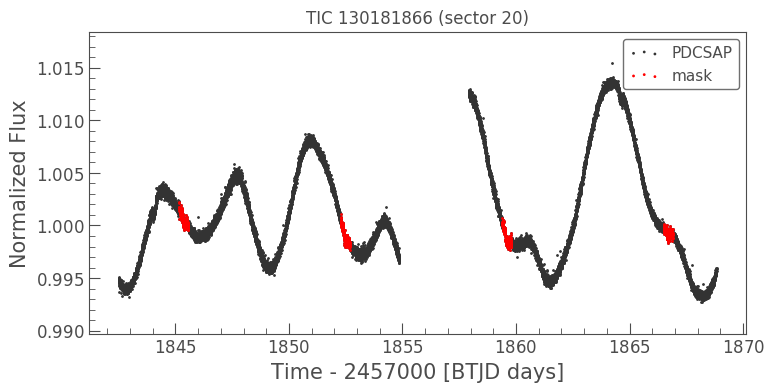

In [3]:
s = cr.ShortCadence(toiid=toiid)
lc = s.get_lc(lctype='pdcsap')
tmask = cr.get_transit_mask(lc,
                            period=s.toi_params['Period (days)'],
                            t0=s.toi_params['Epoch (BJD)']-cr.utils.TESS_TIME_OFFSET,
                            t14_hours=s.toi_params['Duration (hours)'])

ax = lc.scatter(label='PDCSAP')
lc[tmask].scatter(ax=ax, label='mask', c='r')
ax.set_title(f'TIC {s.ticid} (sector {s.sector})')

Text(0.5, 0.98, 'TIC 130181866 (sector 20)')

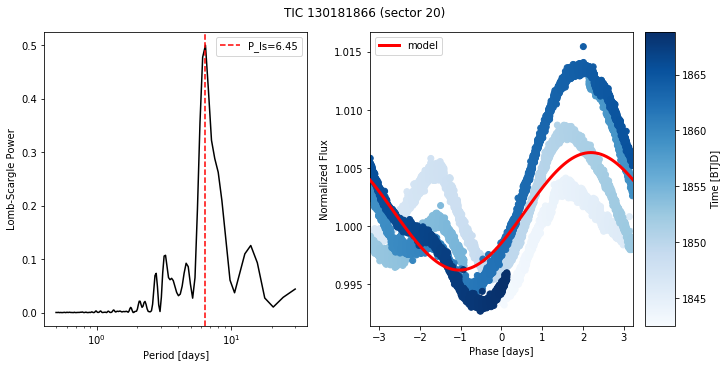

In [4]:
lc = s.lc_pdcsap.remove_outliers().normalize()[~tmask]
fig = cr.plot_lomb_scargle(lc.time, lc.flux)
fig.suptitle(f'TIC {s.ticid} (sector {s.sector})')

P=6.79+/-1.06 d


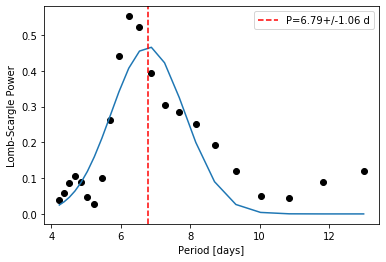

In [5]:
prot, prot_err = cr.get_rotation_period(lc[~tmask], 
                       min_per=0.5, 
                       max_per=None, 
                       npoints=25, 
                       plot=True, 
                       verbose=True)

In [6]:
#get age results
age,age_plus,age_minus,samples = t.get_age(method='gyro', prot=(prot,prot_err), return_samples=True)

Querying Gaia DR2 catalog for 117.479 27.3631 within 2.0 arcsec.

Querying TIC catalog for 117.479 27.3631
            within 2.0 arcsec.

Gaia and TIC catalog cross-match succeeded.
Estimating age using gyrochronology
stellar age = 510.39 + 326.40 - 150.84 Myr


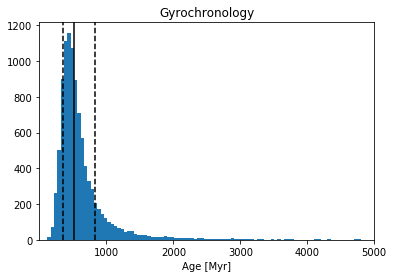

In [7]:
pl.hist(samples/1e6, bins=500);
pl.axvline((age+age_plus)/1e6, 0, 1, ls='--', c='k')
pl.axvline(age/1e6, 0, 1, ls='-', c='k')
pl.axvline((age-age_minus)/1e6, 0, 1, ls='--', c='k')
pl.title('Gyrochronology')
pl.xlabel('Age [Myr]')
pl.xlim(1,5e3);

## age using gyrochronology+isochrones

In [8]:
#first run stardate
star = t.run_stardate(prot=(prot,prot_err), mcmc_steps=5000)

Gaia and TIC catalog cross-match succeeded.
Estimating age using isochrones+gyrochronology


100%|██████████| 5000/5000 [01:28<00:00, 56.35it/s]

nsteps 5000 burnin 0


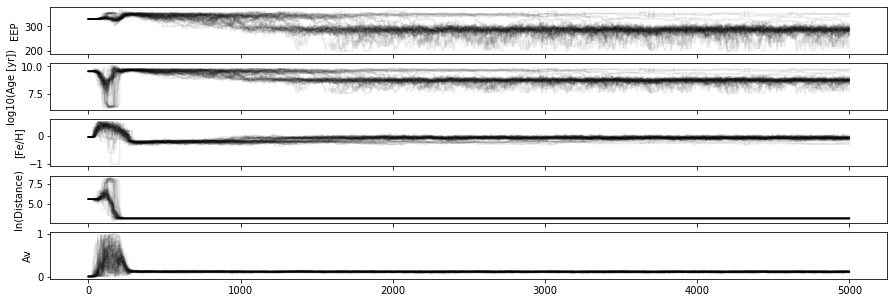

In [9]:
fig = t.plot_flatchain();

In [10]:
#get age results
burnin = 3000
age,age_plus,age_minus,samples = t.get_age(method='isochrones', return_samples=True, burnin=burnin)

stellar age = 557.37 + 240.19 - 184.37 Myr


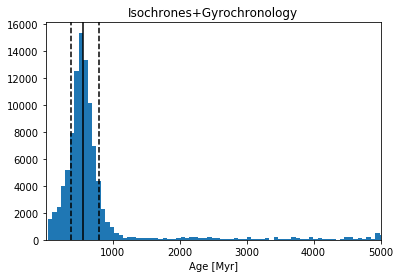

In [11]:
pl.hist(samples/1e6, bins=100);
pl.axvline((age+age_plus)/1e6, 0, 1, ls='--', c='k')
pl.axvline(age/1e6, 0, 1, ls='-', c='k')
pl.axvline((age-age_minus)/1e6, 0, 1, ls='--', c='k')
pl.title('Isochrones+Gyrochronology')
pl.xlabel('Age [Myr]')
pl.xlim(1,5e3);

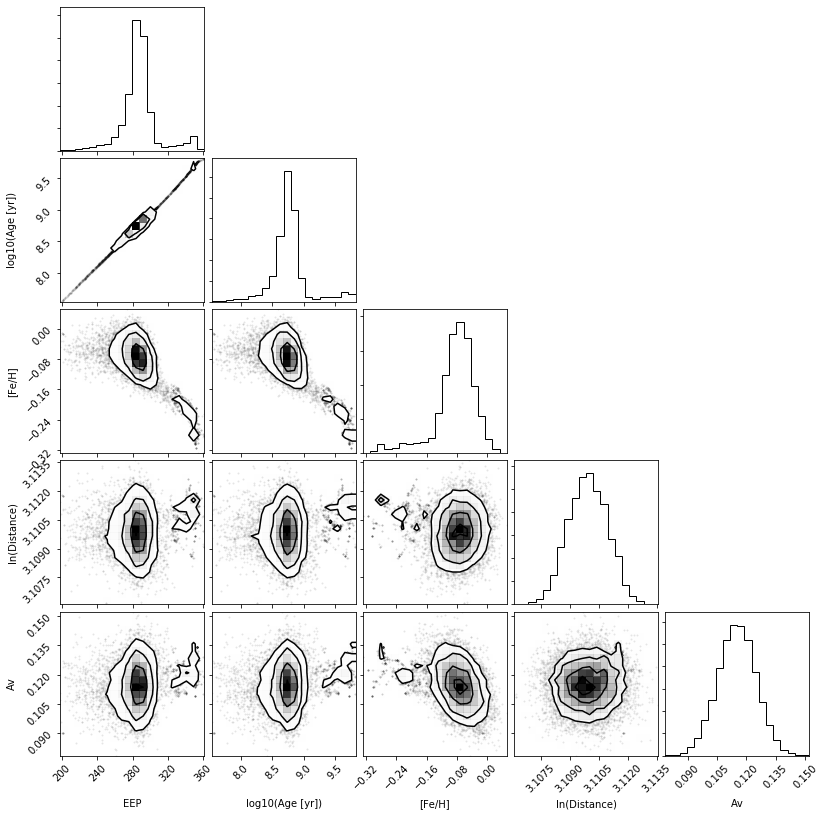

In [12]:
fig = t.plot_corner(burnin=burnin)